error1: +0.402
error1: +0.404
error1: +0.406
error1: +0.408
error1: +0.412
error1: +0.414
error1: +0.416
error1: +0.418
error1: +0.422
error1: +0.424
error1: +0.426
error1: +0.428
error1: +0.432
error1: +0.434
error1: +0.436
error1: +0.438
error1: +0.442
error1: +0.444
error1: +0.446
error1: +0.448
error1: +0.452
error1: +0.454
error1: +0.456
error1: +0.458
error1: +0.462
error1: +0.464
error1: +0.466
error1: +0.468
error1: +0.472
error1: +0.474
error1: +0.476
error1: +0.478
error1: +0.482
error1: +0.484
error1: +0.486
error1: +0.488
error1: +0.492
error1: +0.494
error1: +0.496
error1: +0.498
error1: +0.502
error1: +0.504
error1: +0.506
error1: +0.508
error1: +0.512
error1: +0.514
error1: +0.516
error1: +0.518
error1: +0.522
error1: +0.524
error1: +0.526
error1: +0.528
error1: +0.532
error1: +0.534
error1: +0.536
error1: +0.538
error1: +0.542
error1: +0.544
error1: +0.546
error1: +0.548
error1: +0.552
error1: +0.554
error1: +0.556
error1: +0.558
error1: +0.562
error1: +0.564
error1: +0

IndexError: index 6 is out of bounds for axis 0 with size 6

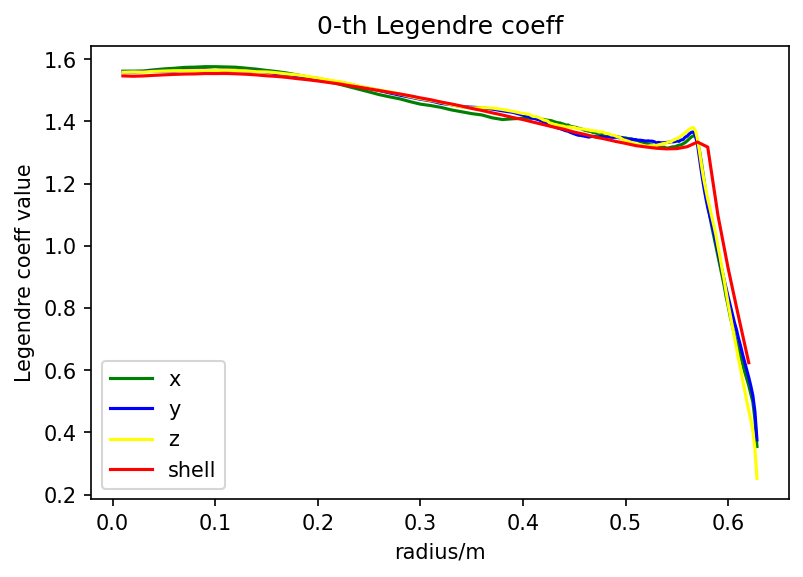

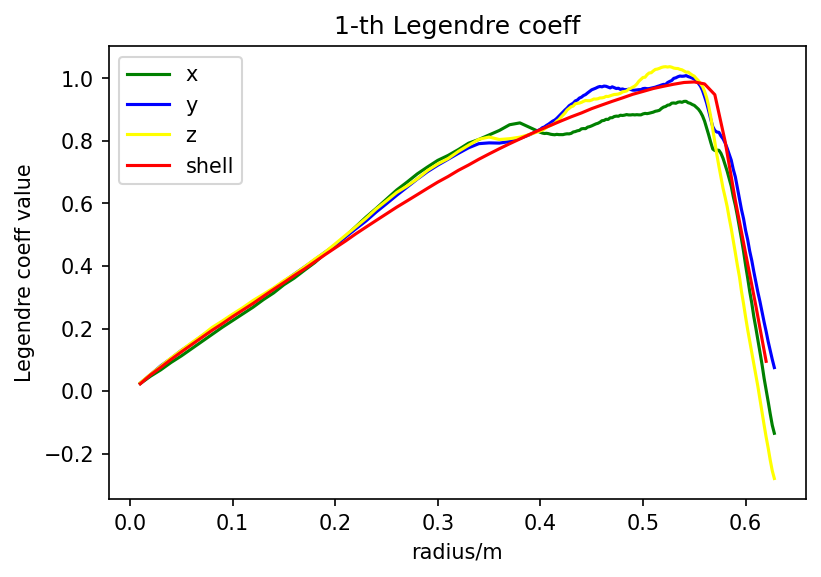

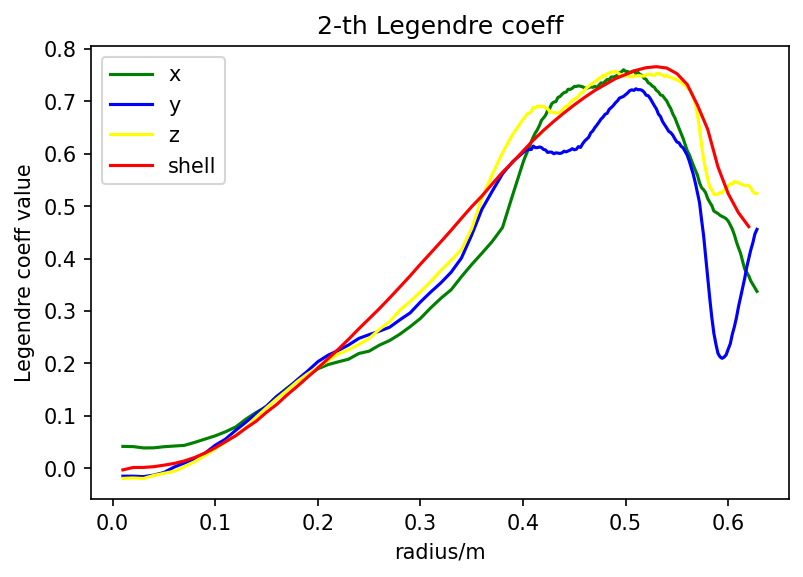

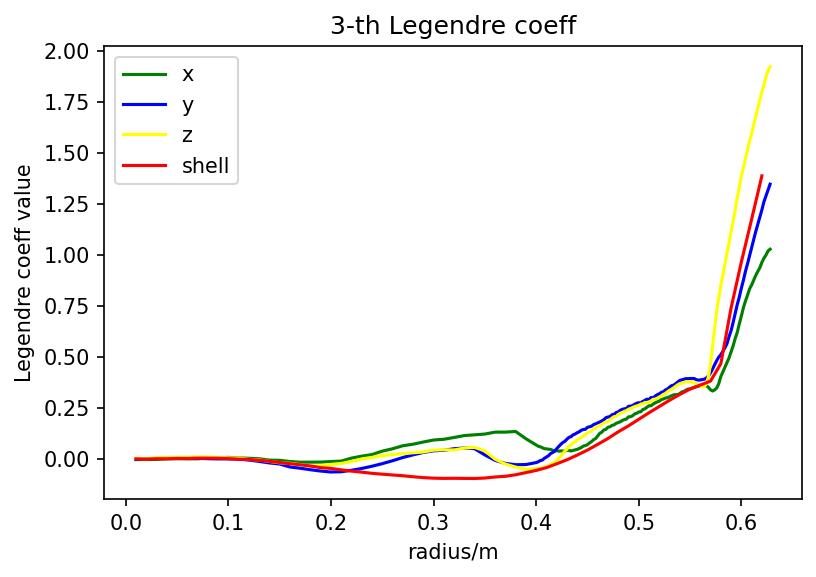

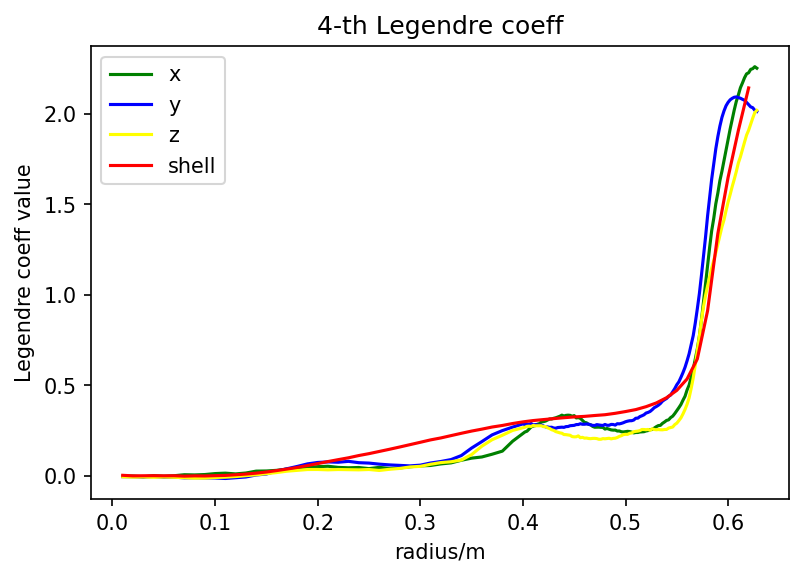

<Figure size 900x600 with 0 Axes>

In [112]:
import os, sys
import tables
import numpy as np
import h5py
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

order = 5
def findfile(path, radius, order):
    data = []
    filename = path + 'file_' + radius + '.h5'
    h = tables.open_file(filename,'r')
    
    coeff = 'coeff' + str(order)
    
    data = eval('np.array(h.root.'+ coeff + '[:])')
    h.close()
    return data

def LoadDataPE_TW(path, radius, order):
    data = []
    filename = path + 'file_' + radius + '.h5'
    h = tables.open_file(filename,'r')
    coeff = 'coeff' + str(order)
    hess = 'hess' + str(order)
    data = eval('np.array(h.root.'+ coeff + '[:])')
    if(eval(radius)<0):
        data[1::2] = - data[1::2]
    h.close()
    return data

def LoadDataPE_TW1(path, radius, order, axis):
    data = []
    filename = path + 'file_' + radius + '+' + axis +'.h5'
    h = tables.open_file(filename,'r')
    coeff = 'coeff' + str(order)
    hess = 'hess' + str(order)
    data = eval('np.array(h.root.'+ coeff + '[:])')
    if(eval(radius)<0):
        data[1::2] = - data[1::2]
    h.close()
    return data

def main_photon(path):
    ## gather the data
    ra = np.hstack((np.arange(0.01, 0.40, 0.01), np.arange(0.40, 0.63, 0.002)))
    #ra = np.arange(0.01, 0.65, 0.05)
    coeff_pe = []
    err = []
    Hessian = []
    rd = []
    for radius in ra:
        str_radius = '%.3f' % radius
        try:
            coeff= LoadDataPE_TW(path, str_radius, order)
            rd.append(np.array(radius))
            coeff_pe = np.hstack((coeff_pe, coeff)) 
        except:
            print('error1: %.3f' % radius)
        
    coeff_pe = np.reshape(coeff_pe,(-1,np.size(rd)),order='F')
    return rd, coeff_pe

def main_photon1(path, axis):
    ## gather the data
    ra = np.hstack((np.arange(0.01, 0.40, 0.01), np.arange(0.40, 0.63, 0.002)))
    #ra = np.arange(0.01, 0.65, 0.05)
    coeff_pe = []
    err = []
    Hessian = []
    rd = []
    for radius in ra:
        str_radius = '%.3f' % radius
        try:
            coeff= LoadDataPE_TW1(path, str_radius, order, axis)
            rd.append(np.array(radius))
            coeff_pe = np.hstack((coeff_pe, coeff)) 
        except:
            print('error1: %.3f' % radius) 
    coeff_pe = np.reshape(coeff_pe,(-1,np.size(rd)),order='F')
    return rd, coeff_pe

def main_photon2(path):
    ## gather the data
    ra = np.hstack((np.arange(0.01, 0.40, 0.01), np.arange(0.40, 0.63, 0.002)))
    #ra = np.arange(0.01, 0.65, 0.05)
    coeff_pe = []
    err = []
    Hessian = []
    rd = []
    for radius in ra:
        str_radius = '%+.3f' % radius
        try:
            coeff= LoadDataPE_TW(path, str_radius, order)
            rd.append(np.array(radius))
            coeff_pe = np.hstack((coeff_pe, coeff)) 
        except:
            print('error1: %+.3f' % radius)
        
    coeff_pe = np.reshape(coeff_pe,(-1,np.size(rd)),order='F')
    return rd, coeff_pe

def main_hit(path):
    ## gather the data
    ra = np.hstack((np.arange(0.01, 0.40, 0.01), np.arange(0.40, 0.63, 0.002)))
    #ra = np.arange(0.01, 0.65, 0.05)
    coeff = []
    err = []
    Hessian = []
    rd = []
    for radius in ra:
        str_radius = '%.3f' % radius
        try:
            str_radius = '%.3f' % radius
            k = findfile(path, str_radius, order)
            rd.append(np.array(radius))
            coeff = np.hstack((coeff, k))
        except:
            print('error2: %.3f' % radius)
    coeff_pe = np.reshape(coeff, (-1,np.size(rd)),order='F')
    return rd, coeff_pe

def main(order):
    #ra1, coeff1 = main_photon('/home/douwei/Recon1t/calib_photon/coeff_pe_1t_track_water/')
    #ra2, coeff2 = main_photon('/home/douwei/Recon1t/calib_photon/coeff_pe_1t_track_oil/')
    #ra2, coeff2 = main_photon('/home/douwei/Recon1t/calib_photon/coeff_pe_1t_track_oil/')
    ra3, coeff3 = main_photon1('/home/douwei/Recon1t/calib/coeff_pe_1t_2.0MeV_dns_single_z/','z')
    ra4, coeff4 = main_photon1('/home/douwei/Recon1t/calib/coeff_pe_1t_2.0MeV_dns_single_x/','x')
    ra5, coeff5 = main_photon1('/home/douwei/Recon1t/calib/coeff_pe_1t_2.0MeV_dns_single_y/','y')
    ra6, coeff6 = main_photon2('/home/douwei/Recon1t/calib/coeff_pe_1t_shell_200000/')
    #ra6, coeff6 = main_photon('/home/douwei/Recon1t/calib/coeff_pe_1t_2.0MeV_dns/')
    #ra2, coeff2 = main_photon('/home/douwei/Recon1t/calib/coeff_pe_1t_2.0MeV_dns_aic_total1/')
    for i in np.arange(order):
        plt.figure(num=i, dpi=150)
        if (i == 0):
            '''
            coeff11 = coeff1[i,:] + coeff1[i+1,:]
            plt.plot(ra1, coeff11,'--', color = 'green', label='track, water')
            coeff12 = coeff2[i,:] + coeff2[i+1,:]
            plt.plot(ra2, coeff12,'--', color = 'blue', label='track, oil')
            '''
            coeff13 = coeff3[i,:] + coeff3[i+1,:]
            plt.plot(ra3, coeff13,'-', color = 'green', label='x')
            coeff14 = coeff4[i,:] + coeff4[i+1,:]
            plt.plot(ra4, coeff14,'-', color = 'blue', label='y')
            coeff15 = coeff5[i,:] + coeff5[i+1,:]
            plt.plot(ra5, coeff15,'-', color = 'yellow', label='z')
            coeff16 = coeff6[i,:] + coeff6[i+1,:]
            plt.plot(ra6, coeff16,'-', color = 'red', label='shell')
        else:
            '''
            coeff11 = coeff1[i+1,:]
            plt.plot(ra1, coeff11, '--',label='track, water',color = 'green')
            coeff12 = coeff2[i+1,:]
            plt.plot(ra2, coeff12, '--',label='track, oil',color = 'blue')
            '''
            coeff13 = coeff3[i+1,:]
            plt.plot(ra3, coeff13, '-',label='x',color = 'green')
            coeff14 = coeff4[i+1,:]
            plt.plot(ra4, coeff14, '-',label='y',color = 'blue')
            coeff15 = coeff5[i+1,:]
            plt.plot(ra5, coeff15,'-', label='z', color = 'yellow')
            coeff16 = coeff6[i+1,:]
            plt.plot(ra6, coeff16,'-', label='shell', color = 'red')
        plt.title('%d-th Legendre coeff' % i)
        bd = 0.63
        #plt.xlim(0,bd)
        #plt.ylim(np.min(coeff11[(ra<bd)&(ra>0)])-0.1, np.max(coeff11[(ra<bd)&(ra>0)])+0.1)
        plt.legend()
        plt.xlabel('radius/m')
        plt.ylabel('Legendre coeff value')
        plt.savefig('/mnt/stage/douwei/Simulation/1t_root/fig/Jinping_shell/coeff_shell%d.png' % i)
#ra2, coeff2 = main_photon1('/home/douwei/Recon1t/calib/coeff_pe_1t_2.0MeV_dns_1/')
main(15)
#ra6, coeff6 = main_photon('/home/douwei/Recon1t/calib/coeff_pe_1t_2.0MeV_dns_1/')

In [110]:
h = tables.open_file('/home/douwei/Recon1t/calib/coeff_pe_1t_shell_200000/file_+0.040.h5')
h.root

/ (RootGroup) ''
  children := ['coeff10' (Array), 'coeff11' (Array), 'coeff12' (Array), 'coeff13' (Array), 'coeff14' (Array), 'coeff15' (Array), 'coeff16' (Array), 'coeff17' (Array), 'coeff18' (Array), 'coeff19' (Array), 'coeff20' (Array), 'coeff21' (Array), 'coeff22' (Array), 'coeff23' (Array), 'coeff24' (Array), 'coeff5' (Array), 'coeff6' (Array), 'coeff7' (Array), 'coeff8' (Array), 'coeff9' (Array)]

In [71]:
ra4, coeff4 = main_photon1('/home/douwei/Recon1t/calib/coeff_pe_1t_2.0MeV_dns_single_x/','x')

/home/douwei/Recon1t/calib/coeff_pe_1t_2.0MeV_dns_single_x/file_0.010+x.h5
/home/douwei/Recon1t/calib/coeff_pe_1t_2.0MeV_dns_single_x/file_0.020+x.h5
/home/douwei/Recon1t/calib/coeff_pe_1t_2.0MeV_dns_single_x/file_0.030+x.h5
/home/douwei/Recon1t/calib/coeff_pe_1t_2.0MeV_dns_single_x/file_0.040+x.h5
/home/douwei/Recon1t/calib/coeff_pe_1t_2.0MeV_dns_single_x/file_0.050+x.h5
/home/douwei/Recon1t/calib/coeff_pe_1t_2.0MeV_dns_single_x/file_0.060+x.h5
/home/douwei/Recon1t/calib/coeff_pe_1t_2.0MeV_dns_single_x/file_0.070+x.h5
/home/douwei/Recon1t/calib/coeff_pe_1t_2.0MeV_dns_single_x/file_0.080+x.h5
/home/douwei/Recon1t/calib/coeff_pe_1t_2.0MeV_dns_single_x/file_0.090+x.h5
/home/douwei/Recon1t/calib/coeff_pe_1t_2.0MeV_dns_single_x/file_0.100+x.h5
/home/douwei/Recon1t/calib/coeff_pe_1t_2.0MeV_dns_single_x/file_0.110+x.h5
/home/douwei/Recon1t/calib/coeff_pe_1t_2.0MeV_dns_single_x/file_0.120+x.h5
/home/douwei/Recon1t/calib/coeff_pe_1t_2.0MeV_dns_single_x/file_0.130+x.h5
/home/douwei/Recon1t/cali